In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from random import randint

In [2]:
#import cleaned data as csv file.  Need to encode with ANSI due to special characters

csv_path_clean = "../data/Cleaned_Data.csv"
solar_clean_df = pd.read_csv(csv_path_clean, delimiter="," , encoding="ISO-8859-1")

#show head of dataframe to ensure proper loading
solar_clean_df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate,Solar_Status
0,0,0,0,0.000000,27145011200,70352.78987,Stearns County,569,1690,13,...,11,13,34,0,0,25,12,0,9.46,No
1,2,3,3,64.505776,27145011302,71496.88658,Stearns County,854,1459,31,...,11,13,34,0,0,25,12,0,9.46,Yes
2,3,0,0,0.000000,27145011304,86840.15275,Stearns County,640,1116,68,...,11,13,34,0,0,25,12,0,9.46,No
3,4,5,5,164.583303,27145011400,89135.31560,Stearns County,654,1314,15,...,11,13,34,0,0,25,12,0,9.46,Yes
4,5,0,0,0.000000,27145011500,62225.90361,Stearns County,522,1395,24,...,11,13,34,0,0,25,12,0,9.46,No


In [11]:
#create function to run statistical testing and plot histograms for any of the column headers for a random sample of those with
#and without solar

#name of function - needs to be passed as "x"
def run_stat_test(x):
    
    #create two new dataframes of 1000 random samples for each those with solar and those without solar
    with_solar=solar_clean_df[solar_clean_df["Solar_Status"]=="Yes"].sample(1000)
    without_solar=solar_clean_df[solar_clean_df["Solar_Status"]=="No"].sample(1000)
    
    #identify max and min values of x in original data frame - this is done to set bin limits for histogram
    max_x=np.max(solar_clean_df[x])
    print(f"Max {x} is {max_x}")
    
    min_x=np.min(solar_clean_df[x])
    print(f"Min {x} is {min_x}")
    
    #create variables to hold histogram values for datasets with and without solar
    x_var = with_solar[x]
    y_var = without_solar[x]
    
    #create 50 histogram bins based on min and max
    bins = np.linspace(min_x, max_x, 50)
    
    #create two separate histograms for with and without solar coverage
    plt.hist(x_var, bins, alpha=0.5, label='with_solar', color="green")
    plt.hist(y_var, bins, alpha=0.5, label='without_solar', color="red")
    
    #create legend, x and y axis labels
    plt.legend(loc='upper right')
    plt.xlabel(f"{x}")
    plt.ylabel("Occurences out of 1000 random samples")
    plt.show()
      
    #calculate mean value for those with and without solar and print values    
    mean_x_with_solar=with_solar[x].mean()
    print(f"Mean {x} with solar is {round(mean_x_with_solar,2)}")

    mean_x_without_solar=without_solar[x].mean()
    print(f"Mean {x} without solar is {round(mean_x_without_solar,2)}")
    
    #return t statistics to determine whether differences in means of data with and without solar are significant
    return stats.ttest_ind(with_solar[x], without_solar[x], equal_var=False)

Max housing_unit_median_value is 2000001.0
Min housing_unit_median_value is 9999.0


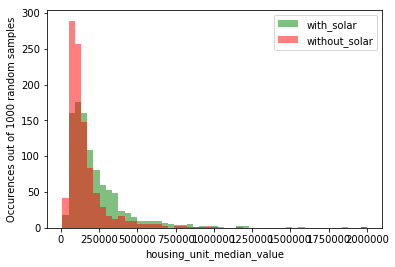

Mean housing_unit_median_value with solar is 226972.1
Mean housing_unit_median_value without solar is 164036.0


Ttest_indResult(statistic=7.924636006035319, pvalue=3.81835387292391e-15)

In [20]:
run_stat_test("housing_unit_median_value")